In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

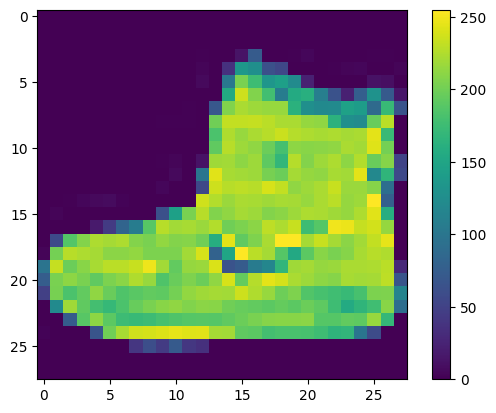

In [10]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

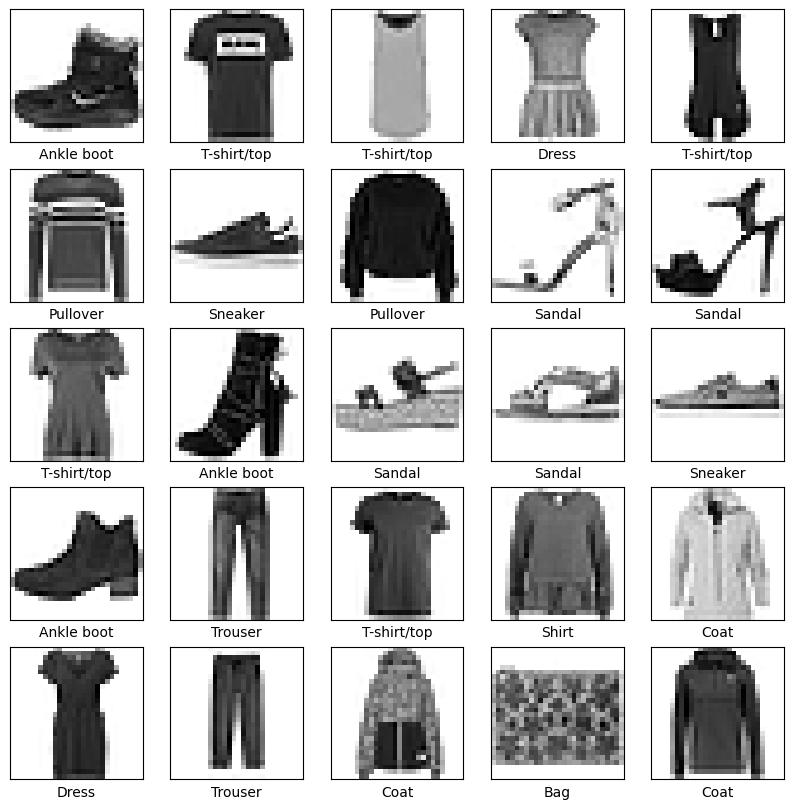

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##### Build the model #####

In [13]:
model = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28, 28)),  #transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(10)
])

Compile the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [15]:
# step1: Feed the training data to the model (train_images and train_labels arrays)
model.fit(train_images, train_labels, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 22s 9ms/step - loss: 0.5005 - accuracy: 0.8246
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3748 - accuracy: 0.8650
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3390 - accuracy: 0.8763
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3137 - accuracy: 0.8843
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2933 - accuracy: 0.8932
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2822 - accuracy: 0.8946
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2702 - accuracy: 0.8997
Epoch 8/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2588 - accuracy: 0.9050
Epoch 9/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2486 - accuracy: 0.9074
Epoch 10/20
1875/1875 [==============================] - 15s 8ms/step -

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3444 - accuracy: 0.8911 - 2s/epoch - 5ms/step

Test accuracy: 0.8910999894142151


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [19]:
predictions[0]

array([5.6877593e-13, 1.2914347e-16, 1.1683173e-16, 5.5568630e-20,
       4.2102426e-16, 2.1711197e-05, 7.0918045e-16, 8.3056930e-04,
       1.3824933e-15, 9.9914765e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

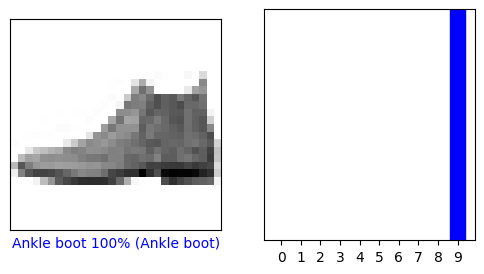

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

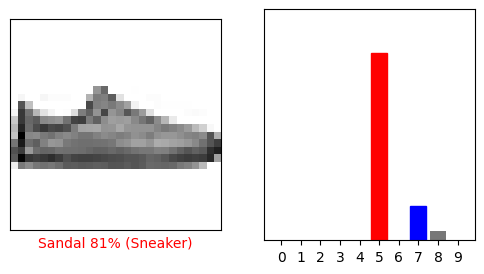

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

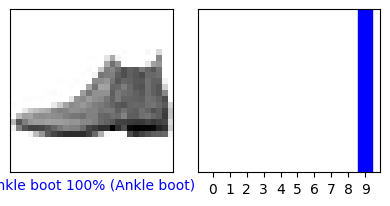

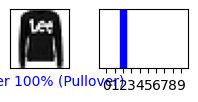

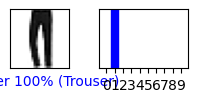

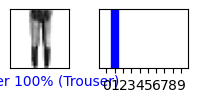

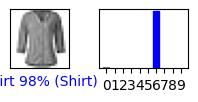

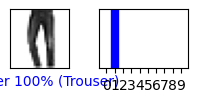

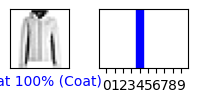

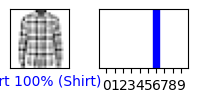

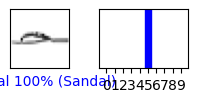

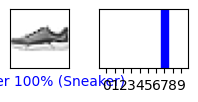

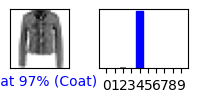

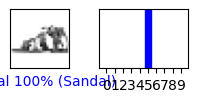

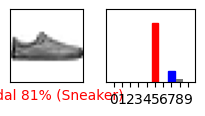

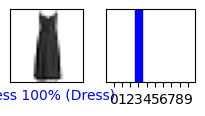

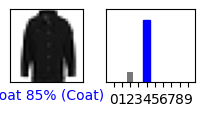

In [30]:
#Let's plot several images with their predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()

Use the trained model to make a prediction about a single image.

In [35]:
img=test_images[1]
print(img.shape)

(28, 28)


In [36]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# Accordingly, even though we're using a single image, we need to add it to a list:
# Adding the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 208ms/step
[[2.4335372e-05 3.1976424e-17 9.9708253e-01 7.4249017e-11 2.7807392e-03
  2.9977090e-13 1.1227468e-04 6.2267809e-19 1.2567355e-12 3.2566440e-18]]


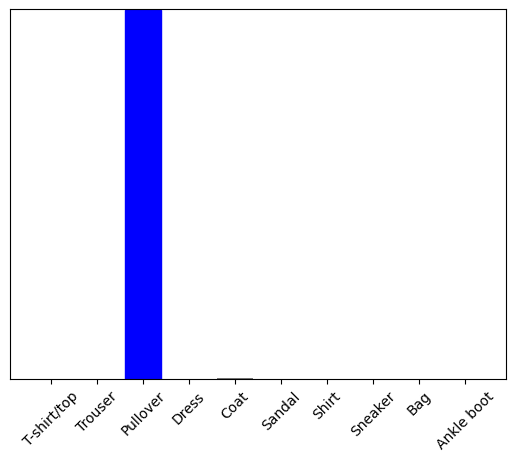

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
np.argmax(predictions_single[0])

2